In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
plt.rcParams['figure.figsize'] = (12,9)

In [44]:
sns.set_style("darkgrid")

In [109]:
pd.set_option('display.max_columns', None)

# Common Fuctions Across Algorithms

In [148]:
hsng_copy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354,price
count,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,1865.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,1994.422520,5.757609,14.791304,0.038261,0.000217,0.062174,0.001957,0.007174,0.016087,0.004783,0.002391,0.009348,0.012609,0.009130,0.006087,0.002391,0.032174,0.000217,0.040652,0.014348,0.040217,0.040652,0.007826,0.020870,0.002391,0.018696,0.000435,0.007174,0.003913,0.01087,0.001304,0.000435,0.001522,0.051087,0.063696,0.038043,0.006304,0.341957,0.026739,0.000652,0.015435,0.000217,0.006304,0.006304,0.025000,0.000870,0.007826,0.010435,0.016087,0.006304,0.023913,0.008478,0.01087,0.001957,0.006957,0.004783,0.009130,0.006087,0.020652,0.002391,0.020652,0.014565,0.019130,0.008913,0.014348,0.004565,0.019348,0.021522,0.020870,0.002391,0.018696,0.021739,0.01087,0.001304,0.000435,0.001522,0.029348,0.021304,0.006087,0.018043,0.003043,0.020652,0.023043,0.015435,0.000217,0.006304,0.013696,0.021304,0.018043,0.011304,0.018043,0.005000,0.032174,0.010652,0.014348,0.012609,0.01000,0.006522,0.015000,0.028261,0.014130,0.028696,0.017174,0.010652,0.014348,0.019348,0.016957,0.020217,0.012391,0.017391,0.011739,0.003478,0.019130,0.012826,0.014565,0.011522,0.010652,0.005000,0.012174,0.014783,0.000652,0.000435,5.519630e+05
std,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,2

In [150]:
def remove_outliers(df_in,outlier_cols):
    df = df_in.copy()
    if type(outlier_cols) == str:
        outlier_cols = [outlier_cols]
    
    desc = df.describe()
    for col in outlier_cols:
        q1 = desc.loc['25%',col]
        q3 = desc.loc['75%',col]
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        df = df[(df[col] >= low) & (df[col] <= high)]
        
    return df
        

In [45]:
def convert_cat(df, cat_cols,output_col=None):
    """
    This function converts all categorical columns into numerical boolean columns.
    
    There are 3 parameters: df, cat_cols, and output_var. 
    
    1. df is the dataframe which needs to have categorical variables converted to numerical variables
    2. cat_cols needs to be a list that contains the names of all categorical columns that need to be converted.
    3. output_var is the name of the output or response variable.  It is set to 'Output' as default."""
    
    df.reset_index(inplace = True, drop = True)
    df_out = df.copy()
    
    for col in cat_cols:
        dummy_col = pd.get_dummies(df_out[col],drop_first = True)
        df_out.drop(col,axis=1, inplace = True)
        df_out = df_out.join(dummy_col)
    
    if output_col != None:
        loc_df_out = list(df_out.columns).index(output_col)
        df_out = df_out[list(df_out.columns[:loc_df_out]) + list(df_out.columns[loc_df_out + 1:]) + list(df_out.columns[loc_df_out:loc_df_out + 1])]
    return df_out

In [195]:
def normalize(df,cols_to_ignore = None):
    """
    This function takes in a dataframe as a parameter and returns the same dataframe with all the features normalized between 0 and 1 using rescaling (min-max normalization)
    """
    l_min = []
    l_max = []
    desc = df.describe()
    if cols_to_ignore == None:
        for col in df.columns:
            l_min.append(desc[col]['min'])
            l_max.append(desc[col]['max'])
        
        t_min = list(zip(df.columns, l_min))
        t_max = list(zip(df.columns, l_max))
 

    else:
        for col in df.drop(cols_to_ignore,axis = 1).columns:
            l_min.append(desc[col]['min'])
            l_max.append(desc[col]['max'])

        t_min = list(zip(df.drop(cols_to_ignore,axis = 1).columns, l_min))
        t_max = list(zip(df.drop(cols_to_ignore,axis = 1).columns, l_max))
    
   
    d_min = {}
    for col,val in t_min:
        d_min[col]=val
    
    d_max = {}
    for col,val in t_max:
        d_max[col]=val
    
    df_copy = df.copy()
    for key in d_min.keys():
        df_copy[key] = df_copy[key].apply(lambda x: (x - d_min[key])/ (d_max[key] - d_min[key]))
    
    return df_copy

In [47]:
def split_df(df,test_size = 0.3,df_to_return = 'df_train'):
    """
    This function takes in a Pandas DataFrame and returns a 
    dataframe that is a subset of that Pandas DataFrame.
    
    There are 3 parameters: df, test_size, and df_to_return
    
    df needs to be a Pandas DataFrame and is the superset dataframe to be divided.
    test_size is the proportion of the dataframe you want to be the testing dataset.
    test_size is set to 0.3 by default.
    df_to_return needs to specified as either 'df_train' or df_test' 
    to return the correct subset dataframe. df_to_return is set to 'df_train' by default
    """
    split_num = int(df.count()[0] * (1-test_size) //1)
    df_train = df.iloc[:split_num,:]
    df_test = df.iloc[split_num:,:]
    if df_to_return in ['df_train','train']:
        return df_train
    elif df_to_return in ['df_test','test']:
        return df_test

In [48]:
def shuffled_split_dfs(df,test_size = 0.3):
    """
    This function takes in a Pandas DataFrame and returns a list of 2
    dataframes.  The first dataframe is the train and the second is the test df.
    
    There are 2 parameters: df and test_size
    
    df needs to be a Pandas DataFrame and is the superset dataframe to be divided.
    test_size is the proportion of the dataframe you want to be the testing dataset.
    test_size is set to 0.3 by default.
    """
    df_copy = df.copy()
    df_copy = df_copy.sample(frac = 1).reset_index(drop = True)
    split_num = int(df_copy.count()[0] * (1-test_size) //1)
    df_train = df_copy.iloc[:split_num,:]
    df_test = df_copy.iloc[split_num:,:]
    return ([df_train,df_test])

In [246]:
def check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None):
    import numpy as np
    """
    This function takes in a pandas DataFrame and returns the accuracy of the model
    
    There are 2 parameters: df and algo
    
    1. df needs to be a Pandas DataFrame and algo is the algorithm used.
    2. algo is set to 'lin' by default but can also be specified as 'log'"""
    
    if algo == 'lin':
        df_out = df.copy()
        df_out['error'] = df.iloc[:,-2] - df.iloc[:,-1]
        ME = df_out['error'].mean()
        MAE = np.abs(df_out['error']).mean()
        RMSE = (sum(df_out['error']**2)/df_out.count()[0]+1) ** 0.5
        
        return {'ME':ME,'MAE':MAE,'RMSE':RMSE}
    
    elif algo == 'log':
        return sum(df['Correct?']/df.count()[0])
    
    elif algo == 'knn':
        pred = pred_df[target_class]
        test = test_df[target_class]
        return sum(pred == test) / len(pred)

# Linear Regression and Logistic Regression

In [50]:
def stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.3,epoch = 10,algo = 'lin',initial_coeffs = 1):
    """
    This function returns a list of the coefficients for the specified algorithm.  
    Currently, this function only performs Linear and Logistic Regression.
    
    The 4 parameters are: dataset, alpha, epoch, and algo
    
    1. dataset needs to be a pandas DataFrame
    2. alpha is the alpha value used in stochiastic gradient descent.  It is set at 0.3 by default.
    3. epoch is the number of iterations through each row in the dataset algorithm will perform.  epoch is set to 10 by default.
    4. algo is the specific algorithm to be used.  algo is 'lin' by default for Linear Regression but can also be specified as 'log' for Logistic Regression
    """

    loc_output_col = list(dataset.columns).index(output_col)
    dataset = dataset[list(dataset.columns[:loc_output_col]) + list(dataset.columns[loc_output_col+1:]) + list(dataset.columns[loc_output_col:loc_output_col + 1])]
    
    from math import exp
    count_rows = dataset.count()[1]
    
    if cols_to_ignore != None:
        dataset_1 = pd.DataFrame(pd.Series(np.ones(dataset.count()[0])),columns = ['X0']).join(dataset.drop(cols_to_ignore,axis = 1))
    else:
        dataset_1 = pd.DataFrame(pd.Series(np.ones(dataset.count()[0])),columns = ['X0']).join(dataset)
        
    coeffs = list(np.ones(len(dataset_1.columns[0:-1])))
    coeffs = [i * initial_coeffs for i in coeffs]
    
    df_columns = list(dataset_1.columns)
    df_input_cols = df_columns
    df_input_cols.remove(output_col)
    
    for ep in range(epoch):
        for row in range(count_rows):
            y = dataset_1.loc[row,output_col]
            output_terms = []
            #return y
            for col in df_input_cols:
                output_terms.append((coeffs[dataset_1.columns.get_loc(col)],dataset_1.loc[row,col]))
            
            output_list = [(x*y) for (x,y) in output_terms]
            
            output = sum(output_list)
            
            if algo == 'lin':
                pred = output
                for i in range(len(coeffs)):
                    coeffs[int(i)] += alpha * (dataset_1.loc[row,output_col] - pred) * dataset_1.iloc[row,int(i)]
                
            elif algo == 'log':
                pred = 1 / (1 + exp(-output))
                
                for i in range(len(coeffs)):
                    coeffs[i] = coeffs[i] + alpha * (y - pred) * pred * (1 - pred) * dataset_1.iloc[row,i]
                    
    
    
    return coeffs

In [51]:
def make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin'):
    """
    This function takes in a pandas DataFrame and a list that contains 
    coefficients for the specified algorith used in the stoch_grad_desc function
    and returns the same dataset (with the addition of the first column being 1s to
    represent X0 in the regression formula) plus a new column at the end, 'Prediction'.
    
    There are 3 parameters: dataset, coeff_list, and algo
    
    1. dataset is the dataframe to used to make predictions dataset needs to be a Pandas DataFrame
    2. coeff_list should be the list that was the result of running the stoch_grad_desc function
    3. algo is the specific algorithm to be used.  algo is set to 'lin' by default but can be set to 'log'"""
    
    loc_output_col = list(dataset.columns).index(output_col)
    dataset = dataset[list(dataset.columns[:loc_output_col]) + list(dataset.columns[loc_output_col+1:]) + list(dataset.columns[loc_output_col:loc_output_col + 1])]
    dataset_index = dataset.index
    
    if type(cols_to_ignore) == list and cols_to_ignore != None:
        df_ignored_cols = dataset.loc[:,cols_to_ignore]
    elif type(cols_to_ignore) != list and cols_to_ignore != None:
        df_ignored_cols = dataset.loc[:,[cols_to_ignore]]
    if cols_to_ignore != None:
        df_ignored_cols.reset_index(inplace = True)
    
    from math import exp
    
    dataset.reset_index(inplace = True, drop = True)
    
    if cols_to_ignore != None:
        dataset_out = pd.DataFrame(pd.Series(np.ones(dataset.count()[0]))).join(dataset.drop(cols_to_ignore,axis = 1))
    else:
        dataset_out = pd.DataFrame(pd.Series(np.ones(dataset.count()[0]))).join(dataset)

    
    dataset_out.rename(mapper = {0:'X0'},axis = 1, inplace = True)
    
    coeffs = coeff_list
    pred = []
    
    for row in range(dataset_out.count()[0]):
        output_terms = []
        for col in dataset_out.columns[0:-1]:
            output_terms.append((coeffs[dataset_out.columns.get_loc(col)],dataset_out.loc[row,col]))
        output_list = [x*y for (x,y) in output_terms]
        
        output = sum(output_list)
        if algo == 'lin':
            pred.append(output)
        
        elif algo == 'log':
            pred.append(1/(1 + exp(-output)))
    dataset_out = dataset_out.join(pd.DataFrame(pred))
    dataset_out.rename(mapper = {0: 'Prediction'},axis = 1, inplace = True)
    
    if algo == 'log':
        dataset_out['Crisp'] = dataset_out['Prediction'].apply(lambda predi: 1 if predi >= 0.5 else 0)
        dataset_out['Correct?'] = dataset_out.iloc[:,-3] == dataset_out['Crisp']
    
    if cols_to_ignore != None:
        dataset_out = pd.concat([df_ignored_cols,dataset_out],axis = 1)
    dataset_out.drop('X0',axis = 1,inplace = True)
    
    dataset_out.set_index(dataset_index,inplace = True)
    return dataset_out

# Reading Housing Data

In [91]:
housing = pd.read_csv(r"Melbourne Housing Data.csv")

In [92]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [54]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [55]:
housing.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [58]:
list(housing.columns[0:1])

['date']

In [59]:
housing[housing['date'].str[0:4] == '2014'].shape[0]

4600

### From above, it shows that all the houses purchased were bought in 2014.  I will be extractracting the month and the day of purchase to use as features

In [93]:
housing["Purchase_Month"] = housing['date'].apply(lambda date: int(date.split('-')[1]))

In [94]:
housing['Purchase_Month'].head()

0    5
1    5
2    5
3    5
4    5
Name: Purchase_Month, dtype: int64

In [95]:
housing["Purchase_DoM"] = housing['date'].apply(lambda date: int(date.split('-')[2][0:2]))

### I am now converting the statezip column to two separate columns for state and zip

In [97]:
housing['State'] = housing['statezip'].apply(lambda sz: sz[0:2])

In [98]:
housing['Zip'] = housing['statezip'].apply(lambda sz: sz[2:])

In [99]:
housing['State'].value_counts().count()

1

In [100]:
housing['Zip'].value_counts().count()

77

In [102]:
housing['country'].value_counts().count()

1

### Since there is only 1 state, 1 year and 1 country, I will drop their respective columns.  I will also drop the statezip column since the zip was extracted and the street column as it is not useful.

In [103]:
housing.drop(['date','statezip','State','country','street'],axis = 1,inplace = True)

In [104]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,Purchase_Month,Purchase_DoM,Zip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,5,2,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,5,2,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,5,2,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,5,2,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,5,2,98052


### I noticed that if the house was not renovated, the yr_renovated year shows 0 which is inaccurate.  I will be changing it now.

In [105]:
housing['yr_renovated'] = housing['yr_renovated'].apply(lambda yr: np.nan if yr == 0 else yr)

In [106]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,Purchase_Month,Purchase_DoM,Zip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,Shoreline,5,2,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,Seattle,5,2,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,Kent,5,2,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,Bellevue,5,2,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0,Redmond,5,2,98052


In [84]:
housing.groupby('Zip').mean().sort_values(by = 'price')

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Purchase_Month,Purchase_DoM,price
Zip,,,,,,,,,,,,,,,
98002,3.250000,1.902778,1612.666667,7236.750000,1.277778,0.000000,0.000000,3.833333,1510.722222,101.944444,1964.416667,439.611111,5.916667,17.138889,2.235473e+05
98047,3.333333,1.958333,1520.833333,9159.166667,1.333333,0.000000,0.000000,3.166667,1520.833333,0.000000,1993.333333,335.666667,5.666667,17.500000,2.252333e+05
98288,2.666667,1.666667,1356.666667,36042.000000,1.666667,0.000000,0.000000,3.333333,1356.666667,0.000000,1963.333333,667.666667,6.000000,14.666667,2.330000e+05
98168,2.910448,1.376866,1416.268657,10567.940299,1.179104,0.000000,0.029851,3.179104,1213.880597,202.388060,1954.597015,1222.626866,5.731343,15.701493,2.519214e+05
98001,3.253731,1.891791,1789.970149,16021.850746,1.343284,0.000000,0.104478,3.388060,1598.029851,191.940299,1978.149254,953.208955,5.671642,14.835821,2.577348e+05
98032,3.476190,1.833333,1901.714286,12315.476190,1.285714,0.000000,0.190476,3.666667,1629.333333,272.380952,1966.857143,949.142857,5.666667,15.238095,2.613425e+05
98188,3.347826,1.836957,1875.521739,11492.434783,1.260870,0.000000,0.217391,3.217391,1558.826087,316.695652,1967.826087,954.913043,5.739130,15.913043,2.619903e+05
98178,3.367347,1.867347,1791.224490,8652.693878,1.173469,0.000000,0.367347,3.469388,1278.979592,512.244898,1956.551020,1139.408163,5.673469,17.938776,2.639125e+05
98057,3.142857,1.875000,1760.000000,6651.928571,1.285714,0.000000,0.571429,3.571429,1444.285714,315.714286,1949.214286,1137.642857,5.642857,12.214286,2.791083e+05


### Now I will convert categorical columns (city and zip) which are showing up as numerical columns since the numerical value is not correlated with the price

In [108]:
housing = convert_cat(housing,['city','Zip'])

In [110]:
housing.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### I am placing the price column at the end since it is the output variable

In [111]:
loc_price_col = list(housing.columns).index('price')

In [112]:
loc_price_col

0

In [113]:
housing = housing[list(housing.columns[0:loc_price_col]) + list(housing.columns[loc_price_col + 1:]) + list(housing.columns[loc_price_col:loc_price_col + 1])]

In [114]:
housing.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354,price
0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,313000.0


In [130]:
list(housing.columns).index('Yarrow Point')

56

In [131]:
list(housing.columns).index('price')

133

In [132]:
city_cols_ind= [13,57]
zip_cols_ind = [57,133]
price_col_ind = [133]

### Now my dataset is ready for analysis and modelling

# Data Exploration

In [140]:
hsng_copy = housing.copy()

Text(0.5,1,'Number of Bedrooms vs. Price')

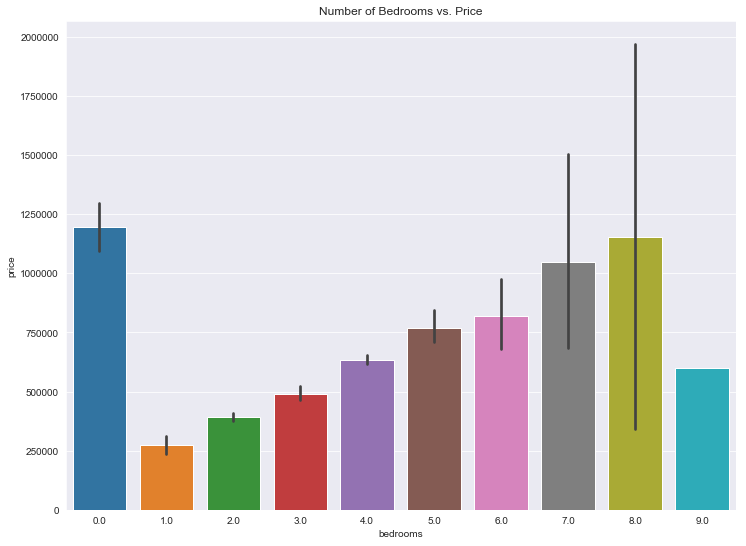

In [141]:
sns.barplot(data = hsng_copy,x = 'bedrooms',y = 'price')
plt.title('Number of Bedrooms vs. Price')

### From the above plot of bedrooms vs price, I noticed 2 peculiarities.  1: zero bedroom houses have the highest price.  This could be because they might not be residential houses but some other property like a storage facility, shed, etc.  It could also be because these houses are located in the center of the city where even houses with no bedrooms might be very expensive.  These two reasons would explain the high price.  2: houses with 9 bedrooms have lower prices than houses with 4 bedrooms.  This might be due to these houses being located in the suburbs where prices in general are lower.

Text(0.5,1,'Number of Bathrooms vs. Price')

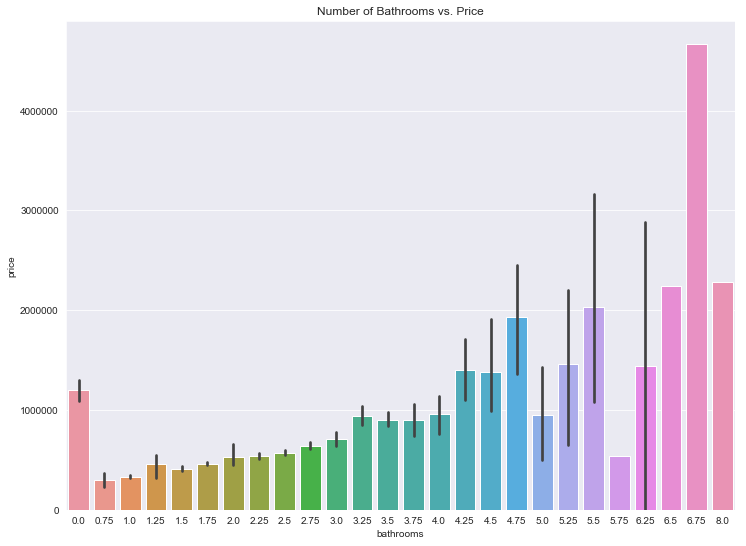

In [143]:
sns.barplot(data = hsng_copy,x = 'bathrooms',y = 'price')
plt.title("Number of Bathrooms vs. Price")

### The graph follows an expected pattern of higher number of bathrooms corresponding to a higher price. From the above graph, the previous insight about 0 bedroom 0 bathroom buildings being present in the dataset is confirmed

Text(0.5,1,'Living Room Size vs. Price')

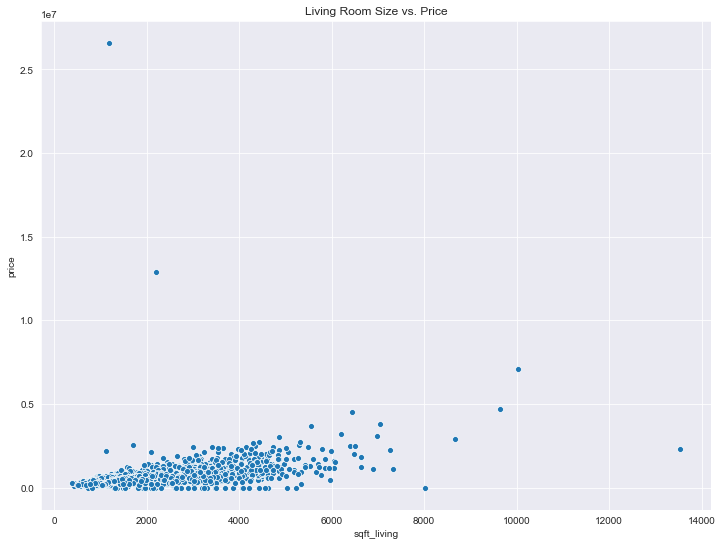

In [144]:
sns.scatterplot(data = hsng_copy,x = 'sqft_living',y = 'price')
plt.title("Living Room Size vs. Price")

### From the plot of sqft_living vs price, it is evident that there is a correlation but there are some outliers which I will get rid of now

In [ ]:
I am calling

In [153]:
hsng_copy = remove_outliers(hsng_copy,['sqft_living','price'])

Text(0.5,1,'Living Room Size vs. Price')

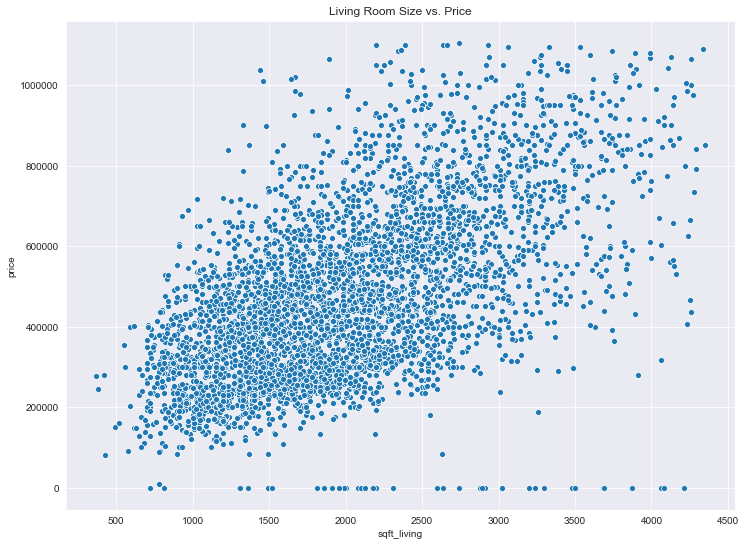

In [154]:
sns.scatterplot(data = hsng_copy,x = 'sqft_living',y = 'price')
plt.title("Living Room Size vs. Price")

In [155]:
hsng_copy.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354,price
0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,313000.0
2,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,NaN,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,342000.0


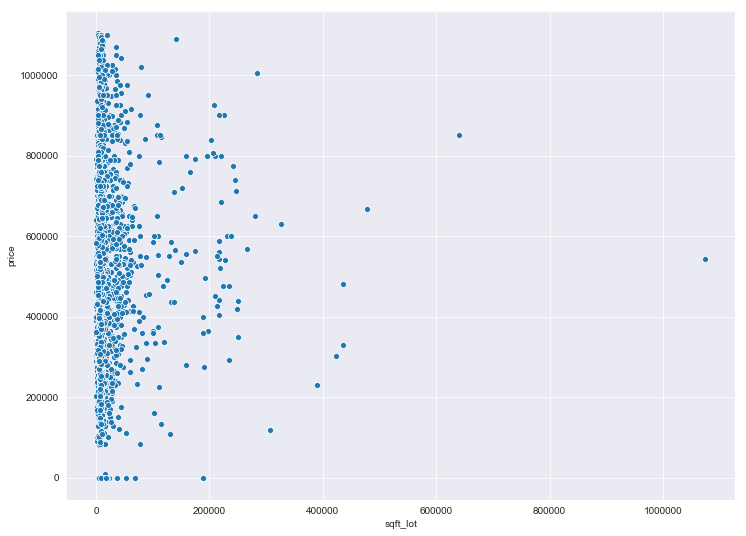

In [156]:
sns.scatterplot(data = hsng_copy,x = 'sqft_lot',y = 'price')

### There are a few outliers for sqft_lot as well which I am going to remove now.

In [157]:
hsng_copy = remove_outliers(hsng_copy,'sqft_lot')

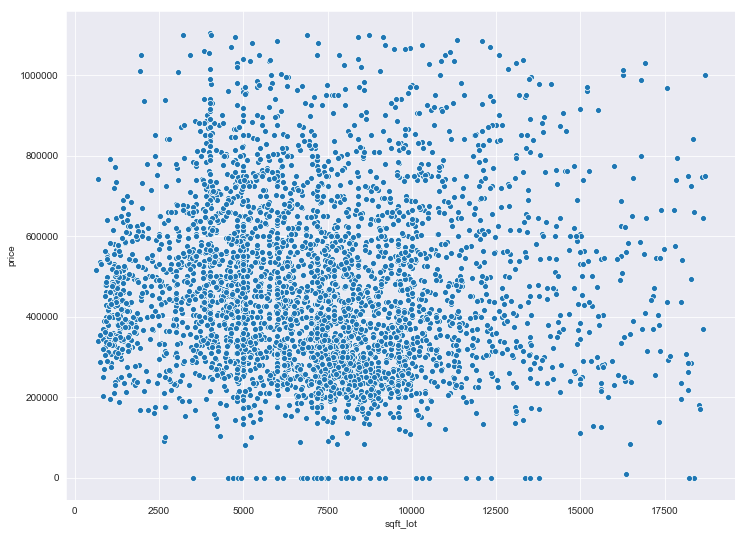

In [158]:
sns.scatterplot(data = hsng_copy,x = 'sqft_lot',y = 'price')

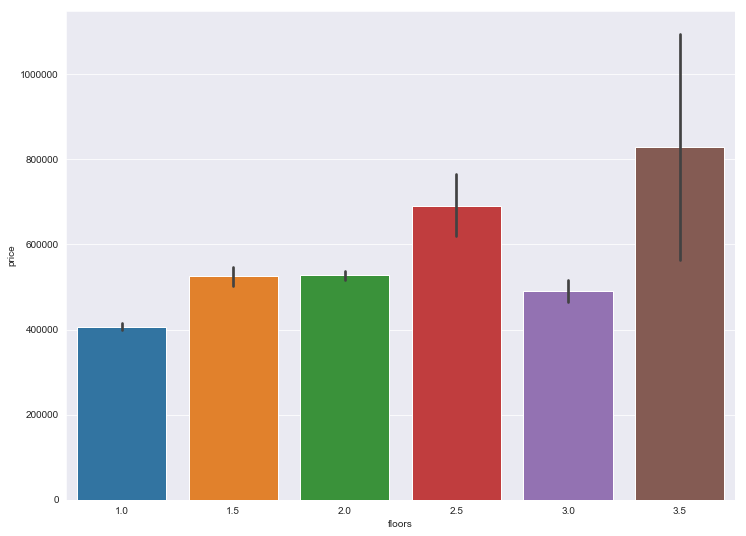

In [159]:
sns.barplot(data = hsng_copy,x = 'floors',y = 'price')

### There seems to be a slight correlation between number of floors and price.

Text(0.5,1,'Waterfront vs. Price')

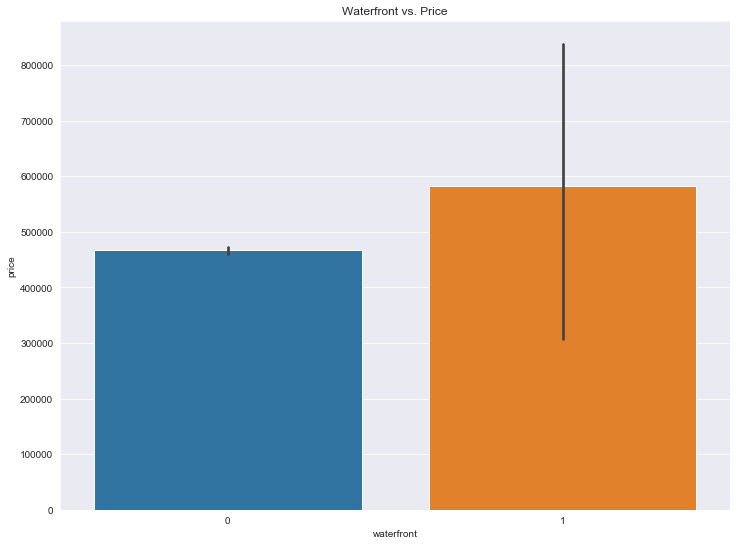

In [166]:
sns.barplot(data = hsng_copy,x = 'waterfront',y = 'price')
plt.title("Waterfront vs. Price")

### Having a waterfront is correlated somewhat with an increased housing price

Text(0.5,1,'View vs. Price')

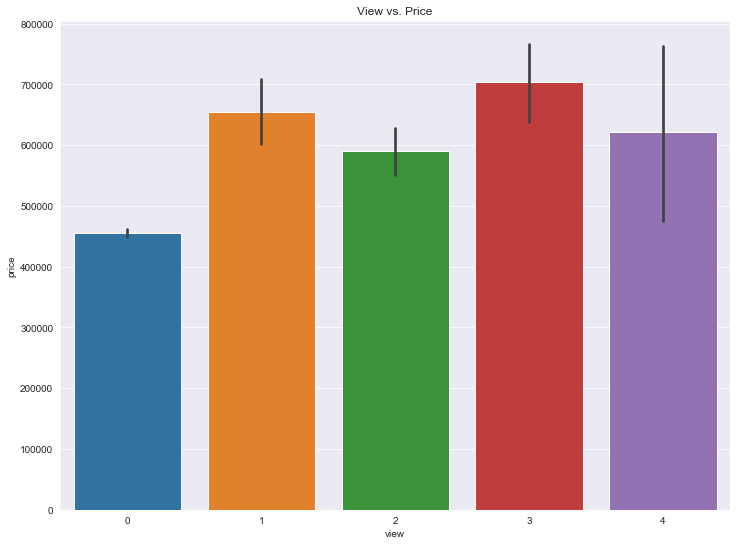

In [165]:
sns.barplot(data = hsng_copy,x = 'view',y = 'price')
plt.title("View vs. Price")

### There looks to be some correlation between view and price

Text(0.5,1,'Condition vs. Price')

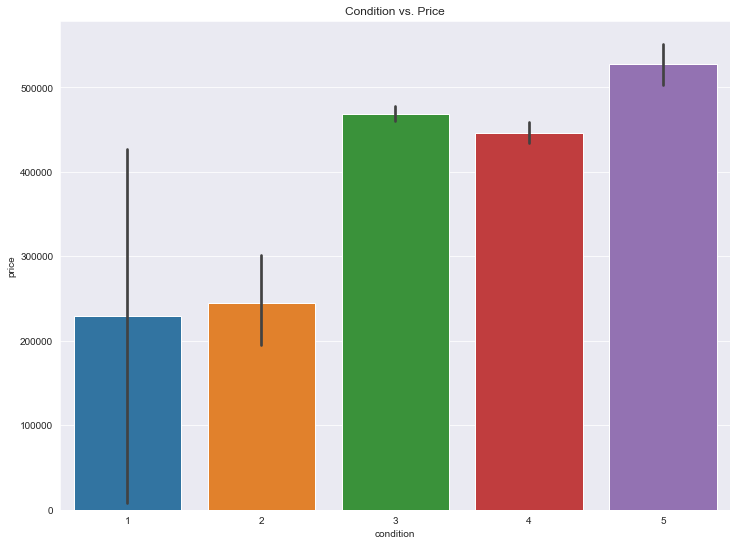

In [164]:
sns.barplot(data = hsng_copy,x = 'condition',y = 'price')
plt.title("Condition vs. Price")

### There is visually a great correlation between condition and price

Text(0.5,1,'Area Above vs. Price')

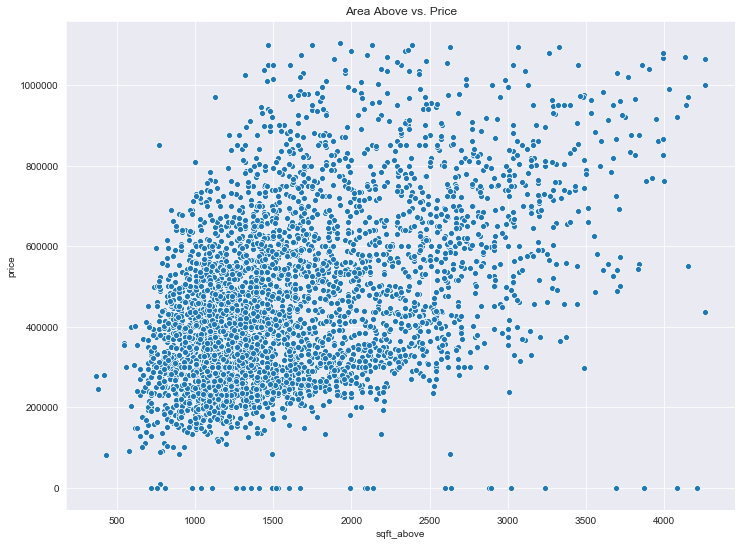

In [171]:
sns.scatterplot(data = hsng_copy,x = 'sqft_above',y = 'price')
plt.title("Area Above vs. Price")

### There is visually a great correlation between area above and price

Text(0.5,1,'Basement Area vs. Price')

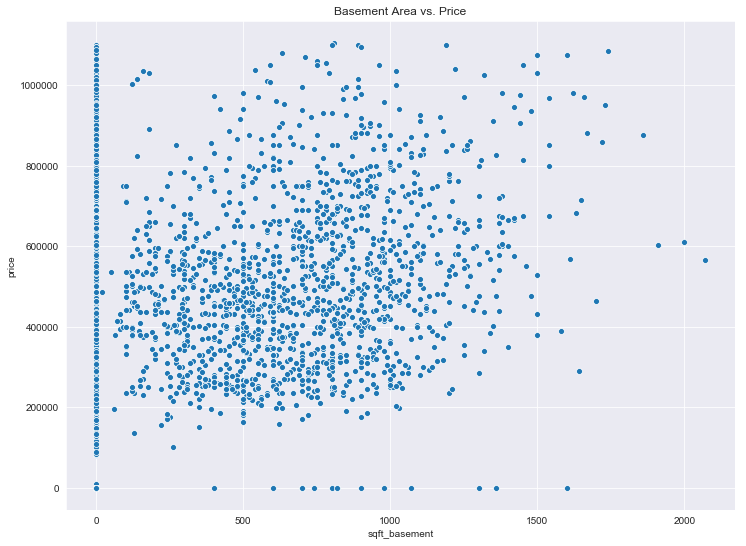

In [173]:
sns.scatterplot(data = hsng_copy,x = 'sqft_basement',y = 'price')
plt.title("Basement Area vs. Price")

### There is visually a great correlation between basement area and price

Text(0.5,1,'Year Built vs. Price')

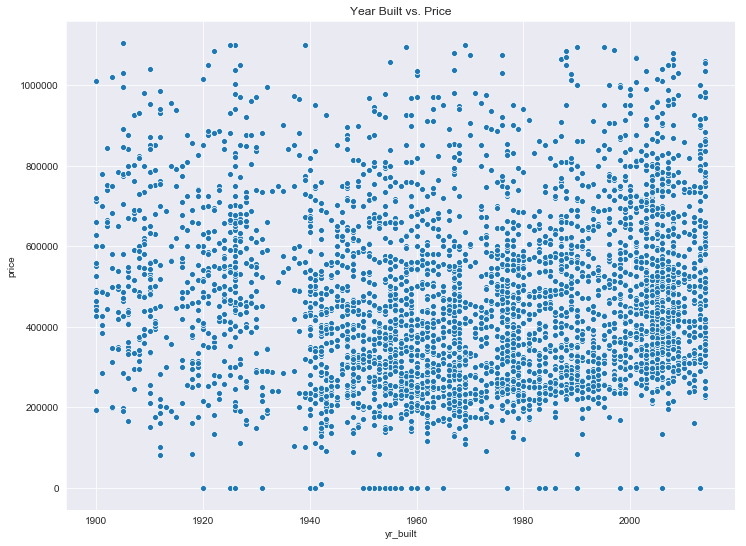

In [174]:
sns.scatterplot(data = hsng_copy,x = 'yr_built',y = 'price')
plt.title("Year Built vs. Price")

### There is visually not a great correlation between year house was built and price

Text(0.5,1,'Condition vs. Price')

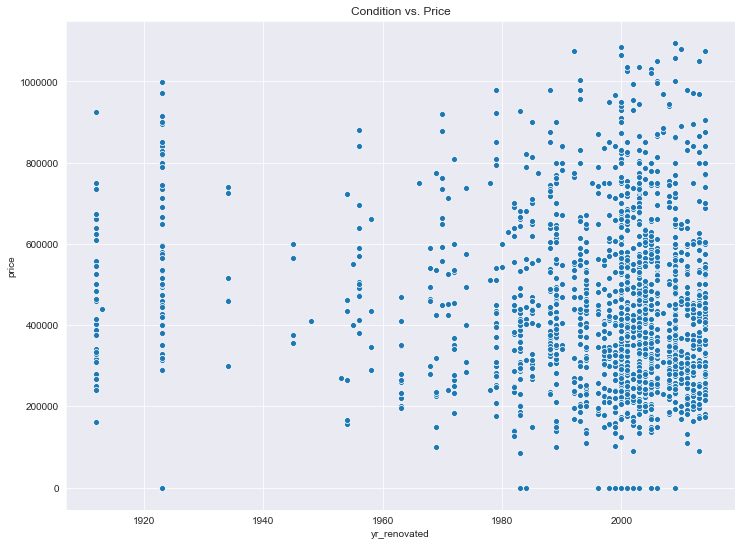

In [176]:
sns.scatterplot(data = hsng_copy,x = 'yr_renovated',y = 'price')
plt.title("Condition vs. Price")

### There is visually not a great correlation between year of renovation and price

Text(0.5,1,'Month Purchased vs. Price')

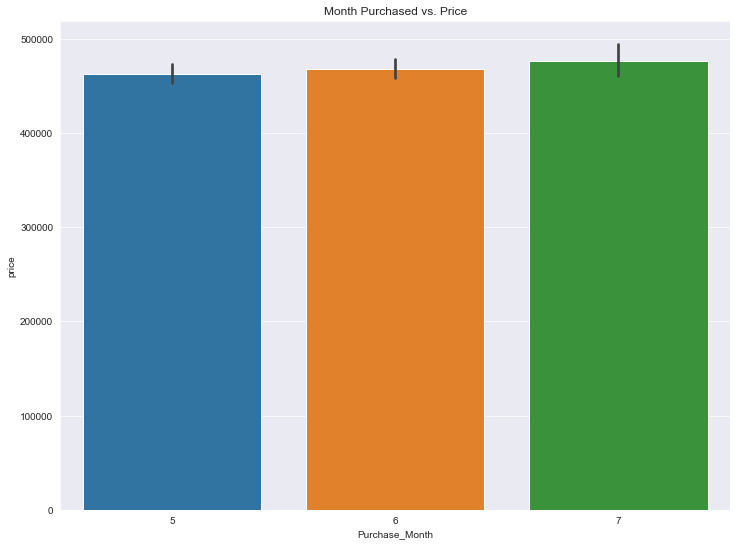

In [177]:
sns.barplot(data = hsng_copy,x = 'Purchase_Month',y = 'price')
plt.title("Month Purchased vs. Price")

### There is visually a small correlation between month of purchase and price

Text(0.5,1,'Day of Month Purchased vs. Price')

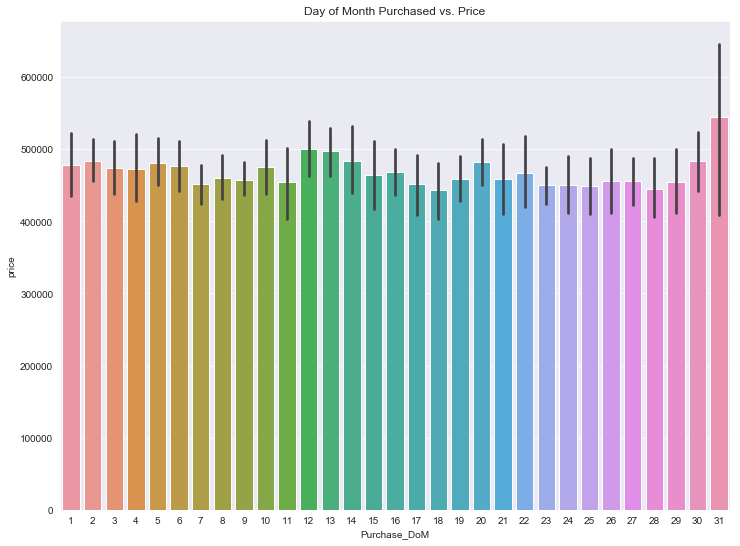

In [178]:
sns.barplot(data = hsng_copy,x = 'Purchase_DoM',y = 'price')
plt.title("Day of Month Purchased vs. Price")

### There is visually not a great correlation between purchase Day of Month and price

### Now I am going to make a heatmap of all columns except zip and state to see how they are correlated with each other and with the price column.
### I will then get rid of any column (A) which is highly correlated with another input column (B) but has a lower correlation with the price column (C) relative to it's pair column (B)

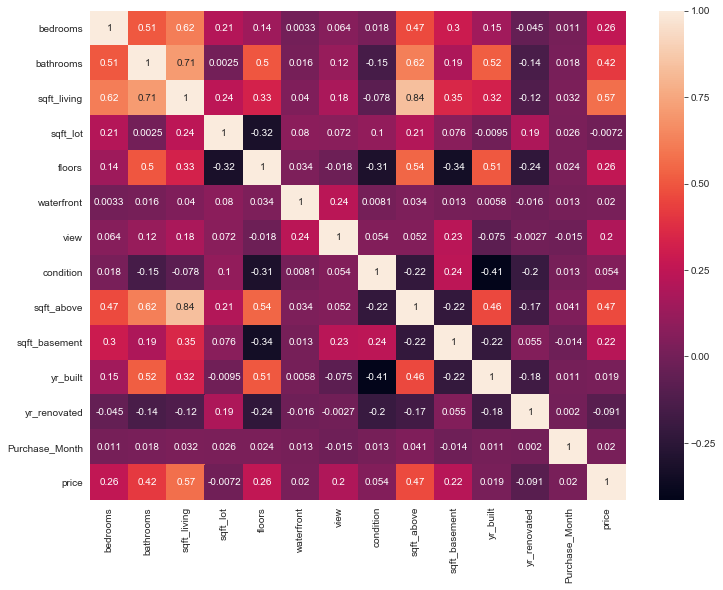

In [185]:
sns.heatmap(hsng_copy[list(hsng_copy.columns)[0:13] + list(hsng_copy.columns)[price_col_ind[0]:]].corr(),annot = True)

### I set the VIF tolerance level equal to 4 where VIF = 1 / (1 - R^2).  Solving for R, R has to be < .866 or > -.866.  Therefore, there is not enough correlation between features to justify removing features to reduce effect of mulitcollinearity

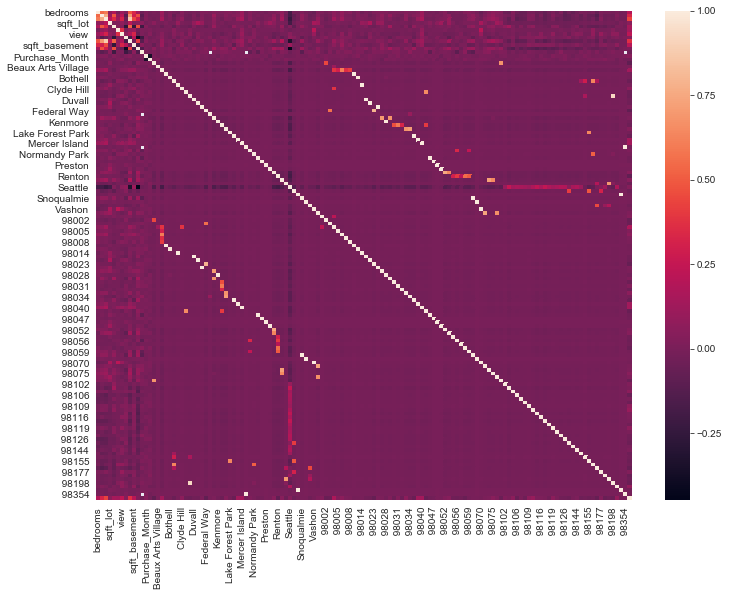

In [115]:
sns.heatmap(housing.corr())

### I created a heatmap of the total dataframe

### Now I am looking at the correlation of all input features with the price and sorting values.

In [189]:
housing.corr()['price'].sort_values()

Auburn           -0.089375
Federal Way      -0.084757
Renton           -0.080926
 98023           -0.068170
 98168           -0.064703
 98042           -0.061270
Maple Valley     -0.055803
 98038           -0.055803
 98106           -0.054518
 98178           -0.053016
 98058           -0.052555
 98002           -0.051737
Des Moines       -0.049503
 98198           -0.048083
 98092           -0.046847
Burien           -0.046045
 98003           -0.045998
 98030           -0.045751
 98133           -0.045234
Covington        -0.044063
SeaTac           -0.043327
 98155           -0.042799
Kent             -0.040837
 98108           -0.039689
Shoreline        -0.038682
 98146           -0.037007
 98188           -0.036461
 98056           -0.036047
 98032           -0.034910
Tukwila          -0.034427
                    ...   
Kirkland          0.036375
 98053            0.040882
Purchase_Month    0.041081
Sammamish         0.047604
Redmond           0.047612
sqft_lot          0.050451
 

### All values are in the range of slight negative correlation with price to moderate positive correlation to price

### Now I am looking at the absolute values of correlations with price.

In [188]:
np.abs(housing.corr()['price']).sort_values()

Preston                0.000388
 98050                 0.000388
 98068                 0.000705
Snoqualmie Pass        0.000705
 98051                 0.002624
Ravensdale             0.002624
Inglewood-Finn Hill    0.003321
 98065                 0.003477
Snoqualmie             0.003477
 98117                 0.003641
 98107                 0.004154
Normandy Park          0.005022
Beaux Arts Village     0.005049
 98122                 0.005236
 98014                 0.005313
Carnation              0.005313
 98072                 0.005553
 98136                 0.005831
 98027                 0.007672
 98103                 0.008635
 98008                 0.009483
 98354                 0.009876
Milton                 0.009876
 98011                 0.010161
Bothell                0.010633
 98070                 0.011219
Vashon                 0.011219
 98144                 0.012058
 98024                 0.012220
Fall City              0.012220
                         ...   
Maple Va

### Even though city and zipcode have a high correlation with price, individual zipcodes and cities are not showing high correlation due to the relatively few values of 1s in each of these columns relative to 0s

### Now I am normalizing the dataset and getting rid of null values

In [224]:
hsng.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354,price
0,0.333333,0.260870,0.249357,0.402724,0.2,0.0,0.0,0.50,0.249357,0.000000,0.482456,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283258
2,0.333333,0.347826,0.401028,0.626121,0.0,0.0,0.0,0.75,0.401028,0.000000,0.578947,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309502
3,0.333333,0.391304,0.419023,0.409257,0.0,0.0,0.0,0.75,0.161954,0.483092,0.552632,0.0,0.033333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380090
4,0.444444,0.434783,0.403599,0.546008,0.0,0.0,0.0,0.75,0.197943,0.386473,0.666667,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497738
5,0.222222,0.173913,0.131105,0.317905,0.0,0.0,0.0,0.50,0.131105,0.000000,0.333333,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443439


In [236]:
hsng = normalize(hsng_copy,cols_to_ignore = 'price')

In [237]:
hsng.isna().sum()[hsng.isna().sum() > 0]

yr_renovated    2235
Medina          3791
 98039          3791
dtype: int64

In [238]:
hsng.drop(['yr_renovated','Medina',' 98039'],axis = 1,inplace = True)

In [239]:
hsng.isna().sum()[hsng.isna().sum() > 0]

Series([], dtype: int64)

In [240]:
[hsng_train,hsng_test] = shuffled_split_dfs(hsng)

In [270]:
hsng_coeffs = stoch_grad_desc(hsng_train,output_col = 'price',alpha = 0.01,epoch = 1,initial_coeffs = 20)

In [271]:
hsng_coeffs

[101209.95268784906,
 54621.9320966573,
 107636.08820223322,
 243119.47027649955,
 45350.49388956172,
 75535.20485385646,
 -4092.7110878404305,
 62767.57971961796,
 83283.38679221178,
 199258.22559551673,
 82445.23758890033,
 -8707.272430183451,
 2598.2920688443032,
 1216.7798155136313,
 -88954.18233018673,
 20.0,
 144048.05707264063,
 -1165.515514510027,
 2623.591790893142,
 -27198.034182935087,
 -3777.7931953052585,
 -8339.249315678837,
 -34821.68930282394,
 -29441.45396394671,
 -15232.39007944282,
 -15718.95952818545,
 -830.077146335246,
 -71871.9979369722,
 -1.9365693169127915,
 56146.55924202788,
 1200.199822803434,
 -79838.12906318124,
 59323.27464448514,
 -5928.9952105881775,
 -40526.42514289261,
 70851.95504324452,
 -891.0072779944883,
 13094.855441430009,
 -4308.912311800472,
 -10192.62528973865,
 -6656.78285918764,
 777.7943941761495,
 -1454.1670256366156,
 91958.37853331331,
 -55239.62877780048,
 77102.99275396805,
 -22429.327309921326,
 111401.85923678268,
 3636.08601267468

In [272]:
preds = make_predictions(hsng_test,hsng_coeffs,'price')

In [273]:
preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,Purchase_Month,Purchase_DoM,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98040,98042,98045,98047,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98068,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98288,98354,price,Prediction
2653,0.222222,0.173913,0.460154,0.682206,0.0,0.0,0.0,0.5,0.254499,0.386473,0.596491,1.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,305000.0,330651.477415
2654,0.333333,0.434783,0.280206,0.133208,0.4,0.0,0.0,0.5,0.280206,0.000000,0.877193,1.0,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299880.0,440556.841793
2655,0.333333,0.173913,0.200514,0.247038,0.4,0.0,0.0,0.5,0.200514,0.000000,0.096491,0.5,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,425234.547374
2656,0.333333,0.173913,0.331620,0.363858,0.0,0.0,0.0,0.5,0.187661,0.270531,0.552632,0.0,0.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225000.0,243320.147995
2657,0.555556,0.391304,0.465296,0.397243,0.4,0.0,0.0,0.5,0.465296,0.000000,0.754386,0.0,0.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302000.0,382205.940518


In [274]:
check_accuracy(preds)

{'MAE': 86240.18526382073, 'ME': 5115.601938866476, 'RMSE': 129251.2600860888}

In [281]:
MAE = 86240.19

In [277]:
RMSE = 129251.26

In [278]:
std = preds['price'].std()

In [279]:
std

212852.48400025122

In [280]:
RMSE/std

0.6072339752438475

In [282]:
MAE / std

0.40516412296084936

In [283]:
mean = preds['price'].mean()

In [284]:
# SI is the scatter index.  If it is < 1 model was a good fit
SI = RMSE / mean
SI

0.27699945798497994

### On average, the predictions were 0.405 standard deviations from the mean using MAE and 0.607 standard deviations from the mean using RMSE.  Since the scatter index is less than 1, this model was a good fit

# Scikit-learn Linear Regression Model

In [254]:
X = hsng.drop('price',axis = 1)
y = hsng['price']

In [251]:
from sklearn.model_selection import train_test_split

In [255]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [256]:
from sklearn.linear_model import LinearRegression

In [257]:
linreg = LinearRegression()

In [258]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
skl_pred = linreg.predict(X_test)

In [262]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [265]:
print("MAE: %s" % mean_absolute_error(y_test,skl_pred))
print("MSE: %s" % mean_squared_error(y_test,skl_pred))
print("RMSE: %s" % ((mean_squared_error(y_test,skl_pred))**.5))

MAE: 156107117000.51642
MSE: 2.31022007822784e+25
RMSE: 4806474881061.837


In [269]:
skl_pred[skl_pred<0]

array([-1.4028779e+05, -1.4798948e+14])